In [1]:
import pandas as pd
import numpy as np
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv')
df = df.dropna()
df_clean = df.copy()
df_clean = df_clean.iloc[1:, 1:]
for col in df_clean.columns:
    df_clean[col] = df_clean[col].astype(int)

In [3]:
feature_name_dic = dict(zip(df_clean.columns, df_clean.iloc[0,:]))

nominal_features = ['X2', 'X4']
ordinal_features = ['X3']+[f'X{i}' for i in range(6, 11+1, 1)]
label = ['Y']
other_features = list(set(df_clean.columns) - (set(nominal_features + ordinal_features + label)))

ordinal_features_plus = ['X10',  'X6']
# o = ['X8', 'X7', 'X9']

# ordinal_features = list(set(ordinal_features)-set(o))

# # ordinal_features = ['X8', 'X7', 'X9']

In [4]:
unique_dic = utility.df_to_dict(df_clean)

unique_ordered_dic = utility.order(unique_dic, *(nominal_features+ordinal_features+label))

nominal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(nominal_features)}
ordinal_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(ordinal_features)}
label_dic = {k: unique_ordered_dic[k] for k in set(unique_ordered_dic).intersection(label)}

ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}

In [5]:
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
other_num + nom_num + ord_num, other_num + nom_num + len(ordinal_dic)

(91, 27)

In [8]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(max_iter=1000)
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# sc = StandardScaler()
# kf = KFold(k)   
# X = df_clean.iloc[:, :-1]
# y = df_clean.iloc[:, -1]
# for train_index, test_index in kf.split(df_clean):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], OneHotEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [9]:
# train_res['accuracy'], test_res['accuracy']

In [10]:
res, models = utility.k_fold_validation(k=10, 
                  df=df_clean, 
                  encoders=[OneHotEncoder, ThermometerEncoder, IntegerEncoder], 
                  pred_task=
                    {
                      'name': 'classification',
                      'model': RandomForestClassifier(),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'nominal': {
                        'name': nominal_features,
                        'dict': nominal_dic
                      },
                      'numerical': other_features,
                      'label': label_dic
                    },
                    return_model=True)

c:\bachelor thesis\utility.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_model.fit(X_train_all, label_train)
c:\bachelor thesis\utility.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_model.fit(X_train_all, label_train)
c:\bachelor thesis\utility.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_model.fit(X_train_all, label_train)
c:\bachelor thesis\utility.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_model.fit(X_train_all, label_train)
c:\bachelor thesis\utility.py:129: DataConversionWarning

In [19]:
res

{'OneHotEncoder': {'clf_rep': {'1.0': {'precision': (0.8389635094881136,
     0.01195060055806621),
    'recall': (0.9526110343907022, 0.008762109270599746),
    'f1-score': (0.8921678111065882, 0.010198706893509431),
    'support': (2336.4, 51.70338480215778)},
   '2.0': {'precision': (0.6808404181202381, 0.04507473569766126),
    'recall': (0.3548935261098386, 0.040422161684976116),
    'f1-score': (0.4659431464847045, 0.04236481818079183),
    'support': (663.6, 51.703384802157785)},
   'accuracy': (0.8209, 0.014948838676558706),
   'macro avg': {'precision': (0.759901963804176, 0.026261877631856913),
    'recall': (0.6537522802502703, 0.020462870693102844),
    'f1-score': (0.6790554787956463, 0.022751739046393177),
    'support': (3000.0, 0.0)},
   'weighted avg': {'precision': (0.8041826868246332, 0.0180593455428962),
    'recall': (0.8209, 0.014948838676558706),
    'f1-score': (0.7983657316104166, 0.01624307610650621),
    'support': (3000.0, 0.0)}}},
 'IntegerEncoder': {'clf_r

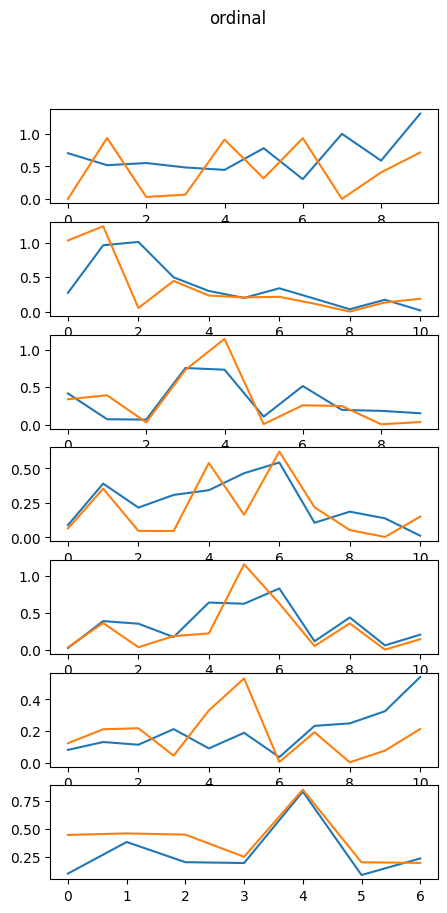

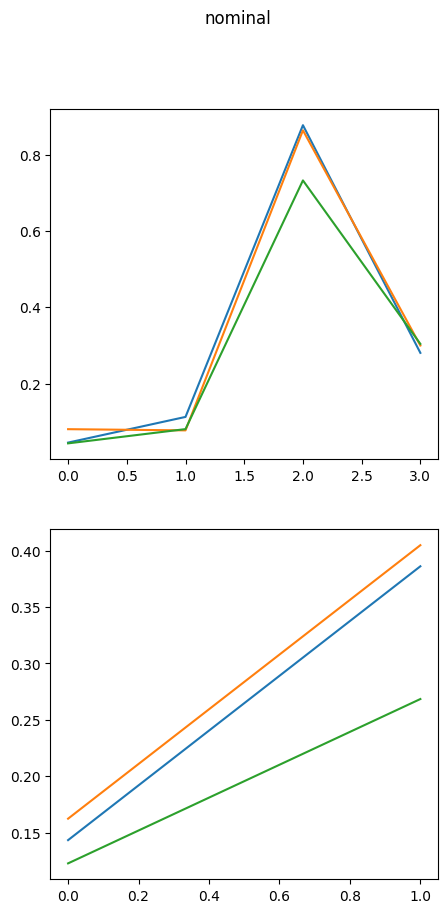

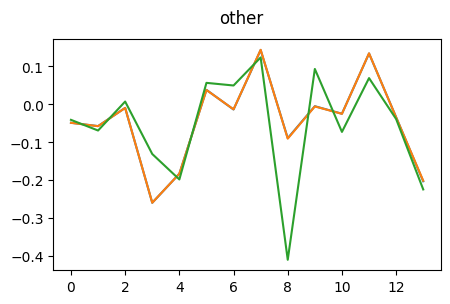

In [20]:
ohe_1 = models['OneHotEncoder'][0]
te_1 = models['ThermometerEncoder'][0]
ie_1 = models['IntegerEncoder'][0]

other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

nom_coef_dic = utility.create_coef_dic(other_num, nominal_dic, ohe_1.coef_,te_1.coef_, ie_1.coef_)
ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ohe_1.coef_,te_1.coef_)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), np.abs(val[j]))

fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,10))
fig.suptitle('nominal')
for i, (key, val) in enumerate(nom_coef_dic.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), np.abs(val[j]))

fig = plt.figure(figsize=(5,3))
fig.suptitle('other')
plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [21]:
k=10
spec_dic = {key: [] for key in ordinal_dic.keys()}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

    nom_coef_dic = utility.create_coef_dic(other_num, nominal_dic, ohe_1.coef_,te_1.coef_, ie_1.coef_)
    ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ohe_1.coef_,te_1.coef_)
    ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
    for key, val in ord_coef_dic_cum.items():
        spec_dic[key] += [np.corrcoef(val)[0][1]]
spec_dic_mean_std = {key : (np.mean(val), np.std(val)) for key, val in spec_dic.items()}

In [22]:
spec_dic

{'X11': [0.5881646893923974,
  0.5945162746591094,
  0.63443949649223,
  0.5401328537870929,
  0.47574831160182185,
  0.5620913558315058,
  0.6130777163692688,
  0.7891178428630731,
  0.6468891735122,
  0.816847865821921],
 'X7': [0.8665064295471391,
  0.977434083867631,
  0.9953331220463164,
  0.9733793825185554,
  0.978504676755535,
  0.9798269219278161,
  0.9721855415181457,
  0.9722238869542781,
  0.9510484878277418,
  0.95997208820539],
 'X10': [0.7083817935694512,
  0.8677968888696015,
  0.6215473314094214,
  0.8770298278033768,
  0.7775610618926168,
  0.9344283960549494,
  0.9064346516694086,
  0.8638899216077701,
  0.9693091369874448,
  0.7781473606995276],
 'X6': [0.8903342285434301,
  0.8090649761234026,
  0.8900558041265613,
  0.9051132485391605,
  0.9135501819189478,
  0.838655241635109,
  0.6794300790243792,
  0.8914350081978147,
  0.8635645084352348,
  0.8695272057478185],
 'X9': [0.6925869294962257,
  0.7498079157937374,
  0.7592125429820289,
  0.6223870897490431,
  0.73

In [23]:
spec_dic_mean_std

{'X11': (0.626102558033062, 0.10008026209383274),
 'X7': (0.9626414621168549, 0.03393557166728729),
 'X10': (0.8304526370563569, 0.10228563468628482),
 'X6': (0.8550730482291857, 0.06575005723271907),
 'X9': (0.7310113743617039, 0.04472084409461063),
 'X8': (0.21636368923066965, 0.10332220182351916),
 'X3': (0.8186094656365899, 0.05749303436020142)}

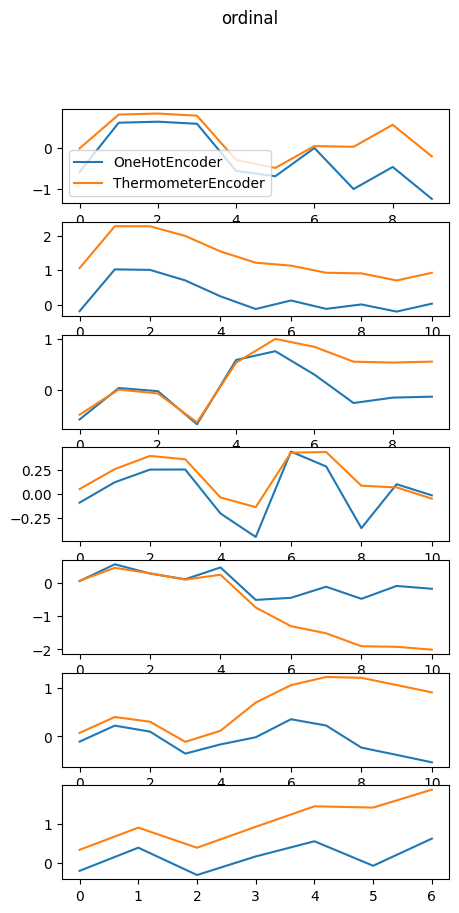

In [24]:
import matplotlib.pyplot as plt

label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j])
ax[0].legend()    

In [25]:
list(ord_coef_dic_cum.keys())

['X11', 'X7', 'X10', 'X6', 'X9', 'X8', 'X3']

In [11]:
d = 8
for encoder in res.keys():
    res[encoder]['clf_rep']['accuracy'] = {key: res[encoder]['clf_rep']['accuracy'] for key in res[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res.keys()]
df_lists = [utility.round_decimal_places(pd.DataFrame(res[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns"), d) for key in res.keys()]

In [7]:
pd.DataFrame(clf_rep_dic).to_csv('default_of_credit_card_clients_k_10_wo_ord.csv')

In [12]:
with open('default_of_credit_card_clients_result\default_of_credit_card_rf.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")